# Exploratory Data Analysis

In [11]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# load the datasets
obs = pd.read_csv("/home/cacaprog/learning-projects/biodiversity/observations.csv")

# print the first few rows of the DataFrame
print(obs.head(5))

# check for missing values
print(obs.isnull().sum())


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
scientific_name    0
park_name          0
observations       0
dtype: int64


In [13]:
obs.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [14]:
# Have duplicated data?
obs.duplicated().value_counts()

False    23281
True        15
dtype: int64

In [15]:
# Check for duplicate data
obs[obs.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [16]:
obs[obs.scientific_name == 'Penstemon procerus']

,scientific_name,park_name,observations
55,Penstemon procerus,Great Smoky Mountains National Park,67
211,Penstemon procerus,Yellowstone National Park,215
2334,Penstemon procerus,Bryce National Park,98
16876,Penstemon procerus,Yosemite National Park,121


Duplicated scientific name. The same specie was found in different parks.

In [17]:
# Calculate the total observations for duplicate records and then remove the duplicates
obs['total'] = obs.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
obs.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
obs = obs[['scientific_name', 'park_name', 'total']]
obs = obs.rename(columns={'total': 'observations'})
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


Let's do the same on spec dataframe

In [18]:
# load the datasets
spec = pd.read_csv("/home/cacaprog/learning-projects/biodiversity/species_info.csv")
# print the first few rows of the DataFrame
print(spec.head(5))

# check for missing values
print(spec.isnull().sum())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


5633 missing data (96,72 %) on conservation_status column

In [19]:
spec.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [20]:
# Have duplicated data?
spec.duplicated().value_counts()

False    5824
dtype: int64

Let's check further, inside dataset

In [21]:
spec[spec.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [22]:
spec[spec.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


Let's drop the duplicate

In [23]:
spec.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)

In [24]:
spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


### 1. What is the distribution of conservation_status for animals?


In [25]:
spec.conservation_status.value_counts()

Species of Concern    151
Endangered             15
Threatened             10
In Recovery             3
Name: conservation_status, dtype: int64

In [26]:
spec.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

Animals = Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, Nonvascular Plant

In [28]:
spec[['scientific_name', 'conservation_status']].groupby('conservation_status').count()

,scientific_name
conservation_status,
Endangered,15
In Recovery,3
Species of Concern,151
Threatened,10


In [29]:
spec.conservation_status.value_counts(normalize=True, ascending=True)

In Recovery           0.016760
Threatened            0.055866
Endangered            0.083799
Species of Concern    0.843575
Name: conservation_status, dtype: float64

In [30]:
# Create a specific dataframe for animals
animal = ('Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish')
animals = spec.loc[spec['category'].isin(animal)]

In [31]:
animals.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern


Now, we can plot the conservation_status for animals

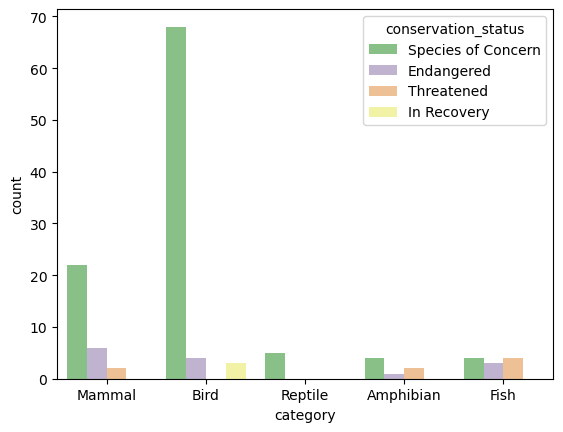

<Figure size 640x480 with 0 Axes>

In [32]:
sns.countplot(x='category', hue='conservation_status', data=animals, palette='Accent')
plt.show()
plt.clf()

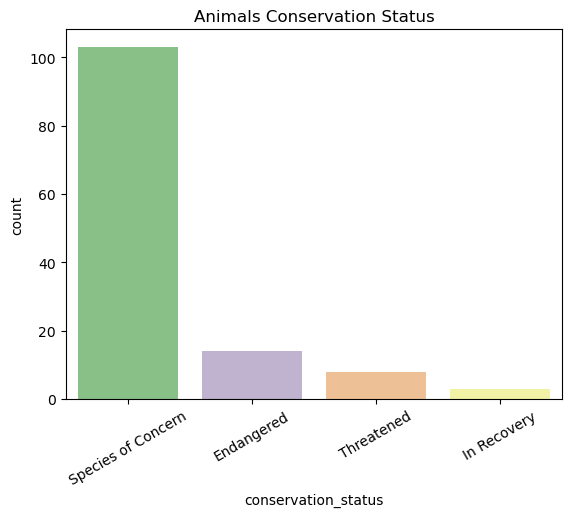

<Figure size 640x480 with 0 Axes>

In [65]:
sns.countplot(x='conservation_status', data=animals, palette='Accent')
plt.xticks(rotation=30)
plt.title('Animals Conservation Status')
plt.show()
plt.clf()

In [34]:
animals.conservation_status.value_counts(normalize=True, ascending=True)

In Recovery           0.023438
Threatened            0.062500
Endangered            0.109375
Species of Concern    0.804688
Name: conservation_status, dtype: float64

**1. What is the distribution of conservation_status for animals?**

Despite the lack of information for all species, we could observe:
- 80% of animals are species of concern
- 10% are endangered
- 6% are threatened
- Only 2% in recovery



### 2. Are certain types of species more likely to be endangered?

In [35]:
spec_endangered = spec[spec.conservation_status == 'Endangered']
spec_endangered.head()

,category,scientific_name,common_names,conservation_status
9,Mammal,Canis rufus,Red Wolf,Endangered
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
173,Bird,Grus americana,Whooping Crane,Endangered


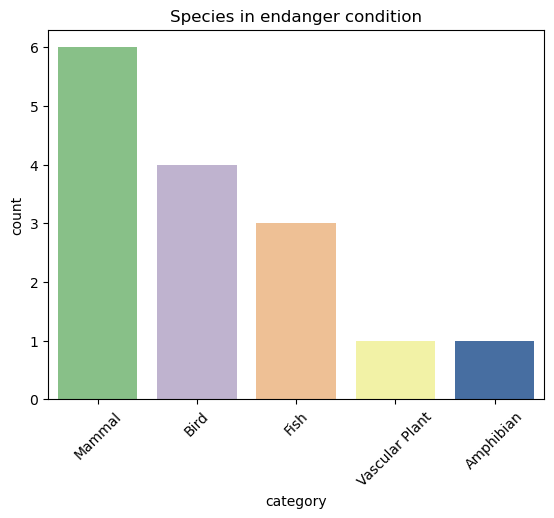

<Figure size 640x480 with 0 Axes>

In [36]:
sns.countplot(data=spec_endangered, x='category', palette='Accent')
plt.xticks(rotation=45)
plt.title('Species in endanger condition')
plt.show()
plt.clf()

In [37]:
spec_endangered.category.value_counts(normalize=True, ascending=False)

Mammal            0.400000
Bird              0.266667
Fish              0.200000
Vascular Plant    0.066667
Amphibian         0.066667
Name: category, dtype: float64

**2. Are certain types of species more likely to be endangered?**

Our observation, shows that mammals, bird and fish are the top 3 species in danger situation.
According the data:
- 40% mammal
- 26% bird
- 20% fish
- 6% Plant
- 6% Anphibian

Two of all species observed are not in danger: reptile and nonvascular plants.

In [38]:
# Merge the dataframes
species_df = spec.merge(obs, on='scientific_name')

In [39]:
# print the first few rows of the DataFrame
species_df.head(5)

# print the DataFrame's shape
species_df.shape

# print the DataFrame's data types and other info
species_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             22164 non-null  object
 1   scientific_name      22164 non-null  object
 2   common_names         22164 non-null  object
 3   conservation_status  716 non-null    object
 4   park_name            22164 non-null  object
 5   observations         22164 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


### 3. Are the differences between species and their conservation status significant?

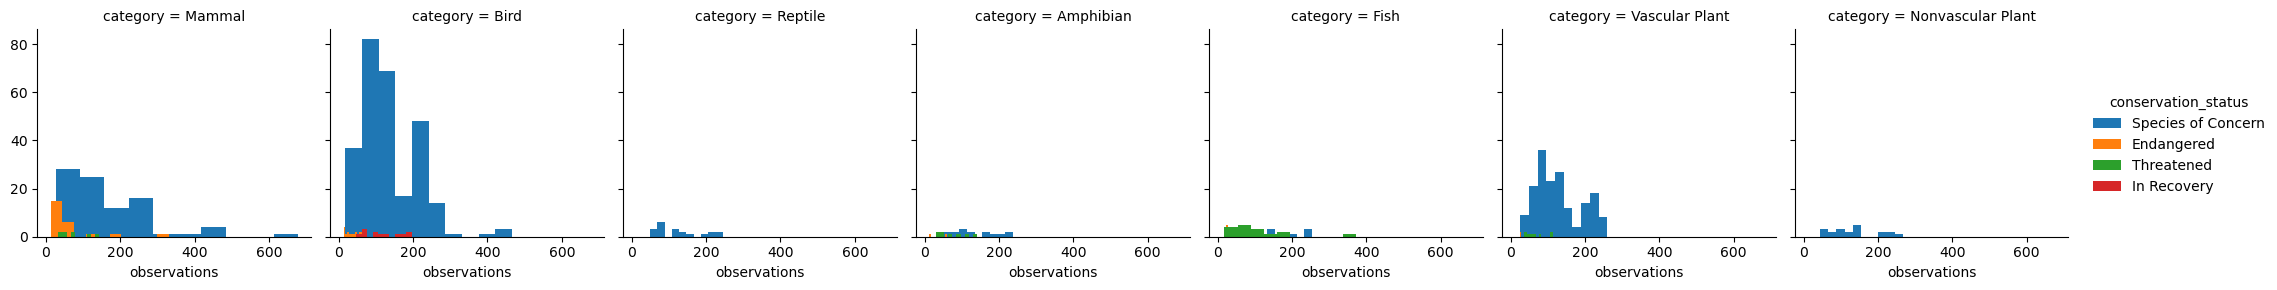

<Figure size 640x480 with 0 Axes>

In [40]:
# Facegrid to compare conservation_status between categories
graph = sns.FacetGrid(species_df, col='category', hue='conservation_status')
graph.map(plt.hist, 'observations').add_legend()
plt.show()
plt.clf()

Despite the data, how many conservation_status are distributed over categories?

In [41]:
# Let´s make a pivot table
pivot_table = species_df.pivot_table(index='category', columns='conservation_status', values='observations', aggfunc='mean')
print(pivot_table)

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian             36.000000          NaN          127.750000     70.5000
Bird                  35.875000        116.0          134.713235         NaN
Fish                  37.916667          NaN          131.812500    102.8125
Mammal                60.958333          NaN          163.727273     72.2500
Nonvascular Plant           NaN          NaN          135.250000         NaN
Reptile                     NaN          NaN          126.800000         NaN
Vascular Plant        40.500000          NaN          128.691860     69.0000


There are 4 conservation status: endangered, in recovery, species of concern and threatened.
- All categories have data for 'Species of Concern'
- 'In Recovery' only for Bird category
- Maybe, that data is not complete yeat, the species are under observation for update.

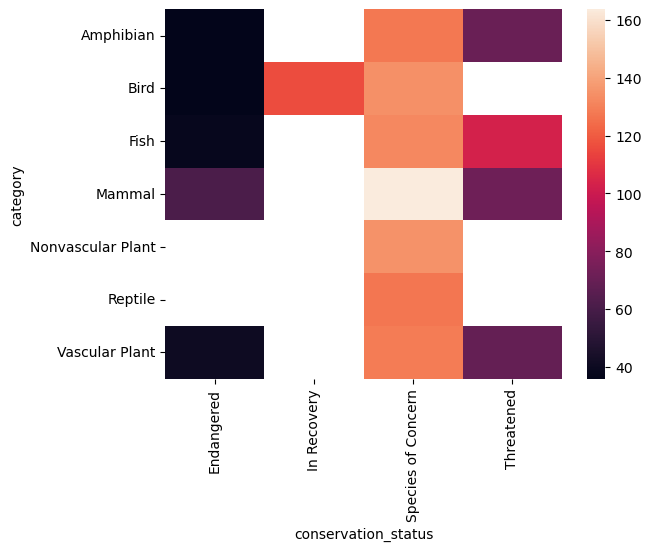

<Figure size 640x480 with 0 Axes>

In [42]:
# Now, create a heatmap to visualize the pivot_table
sns.heatmap(pivot_table)
plt.show()
plt.clf()

Poderíamos transformar estes dados do conservation_status em dados numericos, parece que existe uma ordem lógina nisso.

Species of Concern > Endangered > Threatened > In Recovery

Até pelo núemro de dados fornecidos para isso.


In [43]:
# Create a dictionary of label
conservation_dict = {'Species of Concern': 1, 'Endangered': 2, 'Threatened': 3, 'In Recovery': 4}

# create a new column
species_df['conservation_rating'] = species_df['conservation_status'].map(conservation_dict)

species_df.head(20)

,category,scientific_name,common_names,conservation_status,park_name,observations,conservation_rating
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130,NaN
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270,NaN
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98,NaN
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117,NaN
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128,NaN
5,Mammal,Bos bison,"American Bison, Bison",NaN,Yellowstone National Park,269,NaN
6,Mammal,Bos bison,"American Bison, Bison",NaN,Bryce National Park,68,NaN
7,Mammal,Bos bison,"American Bison, Bison",NaN,Great Smoky Mountains National Park,77,NaN
8,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Bryce National Park,99,NaN
9,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Yosemite National Park,124,NaN


In [44]:
species_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             22164 non-null  object 
 1   scientific_name      22164 non-null  object 
 2   common_names         22164 non-null  object 
 3   conservation_status  716 non-null    object 
 4   park_name            22164 non-null  object 
 5   observations         22164 non-null  int64  
 6   conservation_rating  716 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ MB


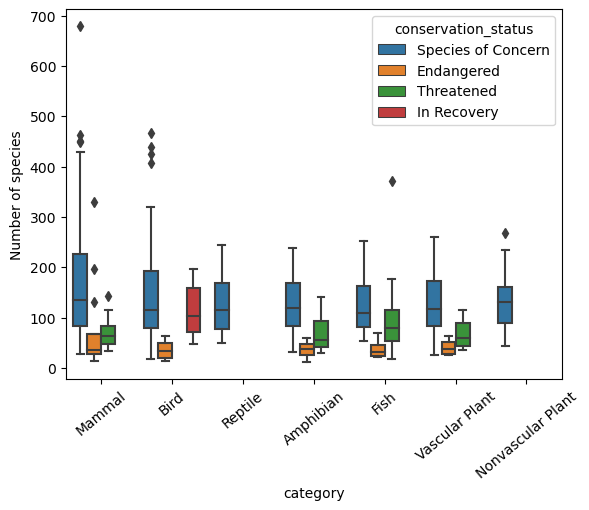

<Figure size 640x480 with 0 Axes>

In [67]:
sns.boxplot(x='category', y='observations', hue='conservation_status',data=species_df)
plt.ylabel('Number of species')
plt.xticks(rotation=40)
plt.show()
plt.clf()

In [68]:
conserv_rating_cat_mean = species_df.groupby('category')['conservation_rating'].mean()
conserv_rating_cat_mean.head()

category
Amphibian            1.714286
Bird                 1.173333
Fish                 2.000000
Mammal               1.333333
Nonvascular Plant    1.000000
Name: conservation_rating, dtype: float64

### 4. Which species were spotted the most at each park?

In [47]:
# Let´s make a pivot table 
pivot_table_park = species_df.pivot_table(index='park_name', columns='category', values='observations').round()
print(pivot_table_park)

category                             Amphibian   Bird   Fish  Mammal  \
park_name                                                              
Bryce National Park                       93.0  106.0   99.0   117.0   
Great Smoky Mountains National Park       72.0   77.0   74.0    85.0   
Yellowstone National Park                246.0  261.0  245.0   289.0   
Yosemite National Park                   145.0  156.0  149.0   172.0   

category                             Nonvascular Plant  Reptile  \
park_name                                                         
Bryce National Park                               99.0    102.0   
Great Smoky Mountains National Park               75.0     73.0   
Yellowstone National Park                        249.0    251.0   
Yosemite National Park                           149.0    147.0   

category                             Vascular Plant  
park_name                                            
Bryce National Park                           104.0  
Gr

In [48]:
pivot_table_cat = species_df.pivot_table(index='category', columns='park_name', values='observations').round()
print(pivot_table_cat)

park_name          Bryce National Park  Great Smoky Mountains National Park  \
category                                                                      
Amphibian                         93.0                                 72.0   
Bird                             106.0                                 77.0   
Fish                              99.0                                 74.0   
Mammal                           117.0                                 85.0   
Nonvascular Plant                 99.0                                 75.0   
Reptile                          102.0                                 73.0   
Vascular Plant                   104.0                                 78.0   

park_name          Yellowstone National Park  Yosemite National Park  
category                                                              
Amphibian                              246.0                   145.0  
Bird                                   261.0                   156.0  
Fish

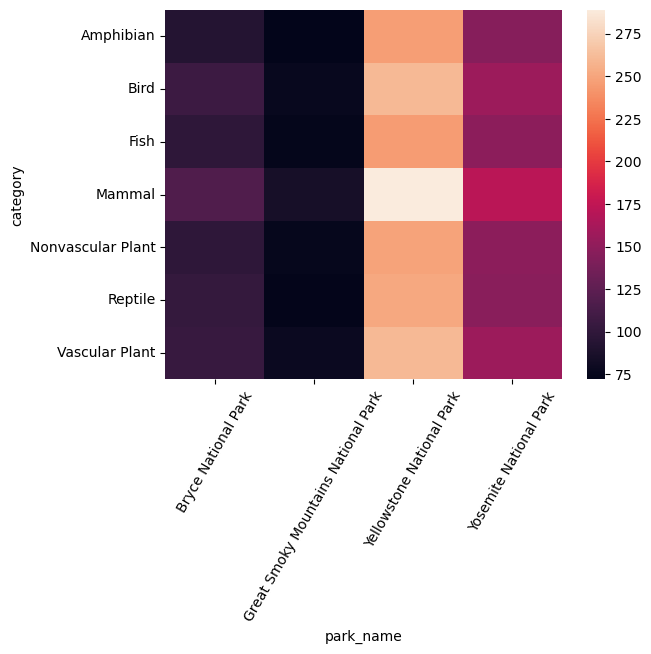

<Figure size 640x480 with 0 Axes>

In [49]:
sns.heatmap(pivot_table_cat)
plt.xticks(rotation=60)
plt.show()
plt.clf()

The number os species categories spotted the most per park:

- Bryce National Park: Mammal, Bird
- Great Smoky Mountains National Park: Mammal, Vascular Plant
- Yellowstone National Park: Mammal, Bird, Vascular Plant
- Yosemite National Park: Mammal, Bird, Vascular Plant

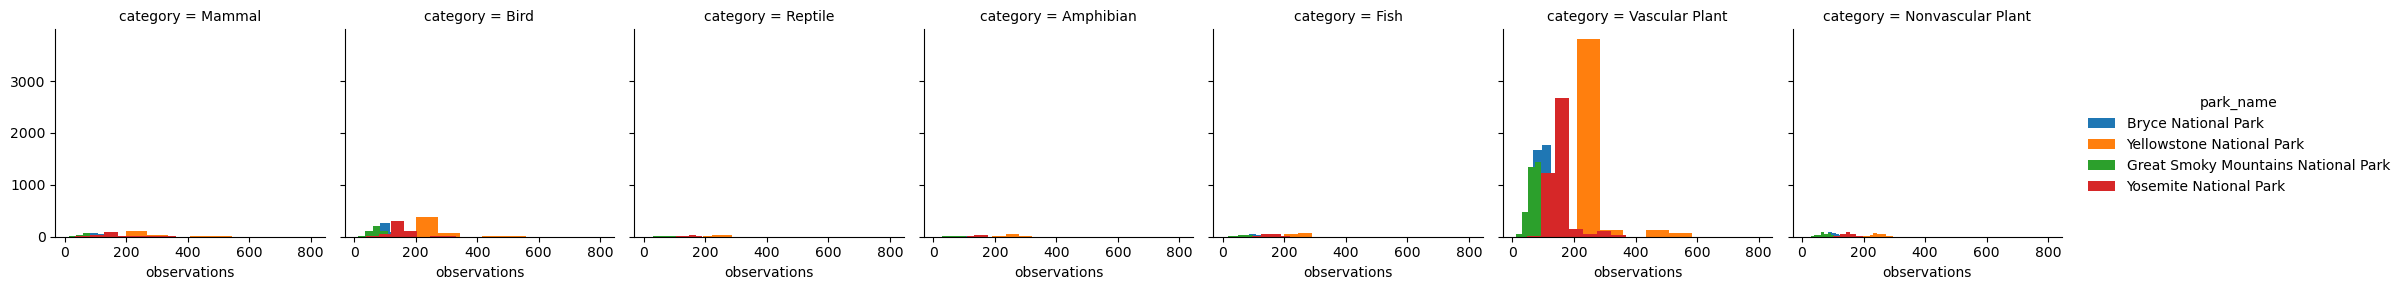

<Figure size 640x480 with 0 Axes>

In [50]:
graph = sns.FacetGrid(species_df, col='category', hue='park_name')
graph.map(plt.hist, 'observations').add_legend()
plt.show()
plt.clf()

Vascular plants are bigger than other categories.
It's difficult to compare others. Let´s try to remove it for our avaliation

In [51]:
categories = ('Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Nonvascular Plant')
category_cleanned = species_df.loc[species_df['category'].isin(categories)]
category_cleanned.head()

,category,scientific_name,common_names,conservation_status,park_name,observations,conservation_rating
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130,NaN
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270,NaN
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98,NaN
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117,NaN
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128,NaN


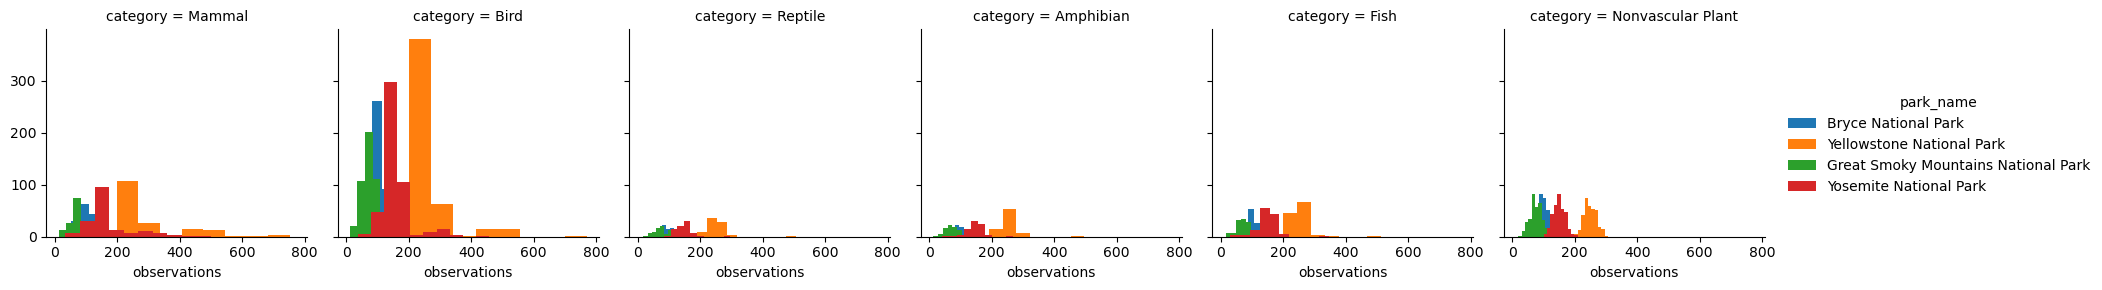

<Figure size 640x480 with 0 Axes>

In [52]:
graph = sns.FacetGrid(category_cleanned, col='category', hue='park_name')
graph.map(plt.hist, 'observations').add_legend()
plt.show()
plt.clf()

To calculate the relation between the columns, we nee to transform the categorical in numerical.
- conservation_status
- park_name

In [53]:
# Separate by parks
yellowstone_park = species_df[species_df['park_name'] == 'Yellowstone National Park']
great_smoky_park = species_df[species_df['park_name'] == 'Great Smoky Mountains National Park']
yosemite_park = species_df[species_df['park_name'] == 'Yosemite National Park']
bryce_park = species_df[species_df['park_name'] == 'Bryce National Park']

In [55]:
yellowstone_park.describe(include='all')

,category,scientific_name,common_names,conservation_status,park_name,observations,conservation_rating
count,5541,5541,5541,179,5541,5541.000000,179.000000
unique,7,5541,5231,4,1,NaN,NaN
top,Vascular Plant,Clethrionomys gapperi gapperi,Brachythecium Moss,Species of Concern,Yellowstone National Park,NaN,NaN
freq,4262,1,7,151,5541,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,260.523732,1.245810
std,NaN,NaN,NaN,NaN,NaN,60.837818,0.632386
min,NaN,NaN,NaN,NaN,NaN,57.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,236.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,250.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,265.000000,1.000000


In [56]:
yellowstone_park.common_names.value_counts()

Brachythecium Moss                                                            7
Dicranum Moss                                                                 7
Panic Grass                                                                   6
Bryum Moss                                                                    6
Sphagnum                                                                      6
                                                                             ..
Plantain-Leaved Sedge                                                         1
Pennsylvania Sedge                                                            1
Longstalk Sedge, Peduncled Sedge                                              1
Sharpscale Sedge                                                              1
Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur    1
Name: common_names, Length: 5231, dtype: int64

In [57]:
yellowstone_species = yellowstone_park.groupby('common_names')['observations'].count()
print('Top species in Yellowstone National Park :')
yellowstone_species.sort_values(ascending=False).head(5)

Top species in Yellowstone National Park :


common_names
Dicranum Moss         7
Brachythecium Moss    7
Panic Grass           6
Sphagnum              6
Bryum Moss            6
Name: observations, dtype: int64

In [58]:
great_smoky_park_species = great_smoky_park.groupby('common_names')['observations'].count()
print('Top species in Great Smoky Mountains National Park :')
great_smoky_park_species.sort_values(ascending=False).head(5)

Top species in Great Smoky Mountains National Park :


common_names
Dicranum Moss         7
Brachythecium Moss    7
Panic Grass           6
Sphagnum              6
Bryum Moss            6
Name: observations, dtype: int64

In [59]:
yosemite_park_species = yosemite_park.groupby('common_names')['observations'].count()
print('Top species in Yosemite National Park :')
yosemite_park_species.sort_values(ascending=False).head(5)

Top species in Yosemite National Park :


common_names
Dicranum Moss         7
Brachythecium Moss    7
Panic Grass           6
Sphagnum              6
Bryum Moss            6
Name: observations, dtype: int64

In [60]:
bryce_park_species = bryce_park.groupby('common_names')['observations'].count()
print('Top species in Bryce National Park :')
bryce_park_species.sort_values(ascending=False).head(5)

Top species in Bryce National Park :


common_names
Dicranum Moss         7
Brachythecium Moss    7
Panic Grass           6
Sphagnum              6
Bryum Moss            6
Name: observations, dtype: int64

In [61]:
bryce_park_species.info()
bryce_park_species.head(10)

<class 'pandas.core.series.Series'>
Index: 5231 entries, A Bluegrass, Bluegrass to Zygodon Moss
Series name: observations
Non-Null Count  Dtype
--------------  -----
5231 non-null   int64
dtypes: int64(1)
memory usage: 81.7+ KB


common_names
A Bluegrass, Bluegrass                     1
A Bramble, Black Raspberry                 1
A Bramble, Blackberry                      1
A Bramble, Highbush Blackberry             1
A Bramble, Truculent Blackberry            1
A Goldenrod, Skunk Goldenrod               1
A Goldenrod, Zig-Zag Goldenrod             1
A Hawthorn, Hawthorn                       1
A Hawthorn, Scarlet Hawthorn               1
A Holboell Rock-Cress, Second Rockcress    1
Name: observations, dtype: int64

In [ ]:
species_df[['observations', 'category']].groupby('category').count()

,observations
category,
Amphibian,316
Bird,1952
Fish,500
Mammal,704
Nonvascular Plant,1332
Reptile,312
Vascular Plant,17048


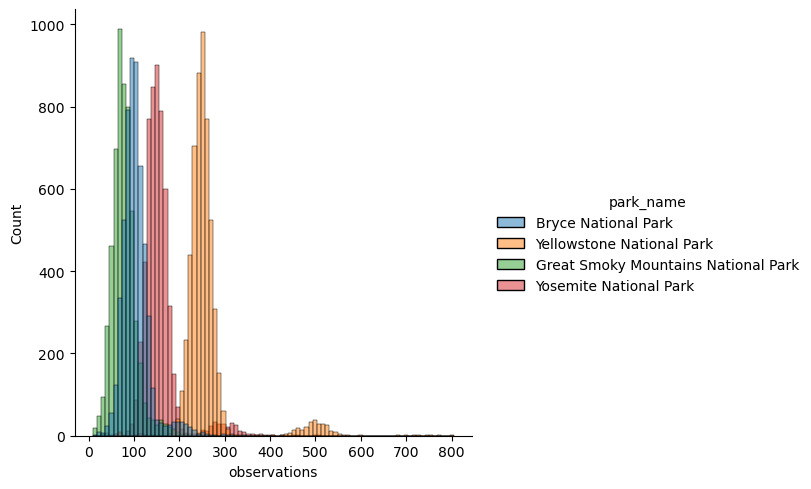

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.displot(data=species_df, x='observations', hue='park_name', alpha=0.5)
plt.show()
plt.clf()

Yellowstone have outliers, more than other parks. What kind of species are there?

In [ ]:
yellowstone_park = species_df[species_df['park_name'] == 'Yellowstone National Park']

In [ ]:
# Let´s check wich species have more than 400 observations

yp_upper = yellowstone_park[yellowstone_park['observations'] >= 400]

print('% of species:')
print((yp_upper.category.value_counts(normalize=True)))

% of species:
Vascular Plant    0.757353
Mammal            0.117647
Bird              0.113971
Amphibian         0.003676
Fish              0.003676
Reptile           0.003676
Name: category, dtype: float64


###